# Basic Operations & Python Tools

## Basic Image Operations:

### DICOM image:

- Reading an image
- Accessing image metadata
- Visualizing the image
- Loading Volume data
- Operations on Volume data

### TIFF image:

- Reading an image
- Accessing image metadata
- Normalize the image
- Visualizing the image

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount = True)
dir_path = '/content/drive/MyDrive/02740_data/003-basic-operations/' # Path to the folder

os.chdir(dir_path)


## DICOM (Digital Imaging and Communications in Medicine)

### Reading an image

Reading an image is the first step in image processing. For DICOM images, we use the `imageio.imread` function, which reads the image from a specified file path. This function returns the image as an array, which can then be manipulated using other Python libraries.




In [17]:
import imageio

im = imageio.v2.imread('body-003.dcm')

print("Image shape:", im.shape)
print("Image dtype:", im.dtype)

print("Image Array:", im)

Image shape: (512, 512)
Image dtype: uint8
Image Array: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
# slice of the 2D-array
im[70:80, 90:100]

Array([[ 94,  94,  97,  98,  99,  94, 106, 101, 106, 113],
       [ 89,  90,  94,  92,  97,  98, 106,  98, 100, 109],
       [ 85,  85,  92, 101,  95,  97, 105, 106,  97, 111],
       [ 86,  87,  89,  92,  94,  94, 103, 102, 100, 112],
       [ 89,  90,  99,  96,  97,  92, 113, 106, 106, 107],
       [ 82,  86,  92,  92,  99,  96, 103,  96, 105, 105],
       [ 90,  82,  87,  97,  90,  93, 103, 103,  99, 106],
       [ 82,  88,  92,  96,  90,  91, 105,  99,  96, 100],
       [ 84,  89,  92,  83,  80,  88,  97, 103, 109,  98],
       [ 91,  82,  89,  89,  92,  90, 104, 101,  97, 101]], dtype=uint8)

### Accessing Image Metadata

Image metadata provides important information about the image, such as dimensions, acquisition date, and more. Using the `img.meta` attribute from the `imageio` object, we can access this metadata and retrieve various details about the image, which can be useful for further processing and analysis.


In [13]:
def beautify_metadata(metadata):
    print("\nDICOM Metadata:")
    print("-" * 40)
    for key, value in metadata.items():
        print(f"{key}:")
        if isinstance(value, (bytes, bytearray)):
            print("Data ByteArray")
        else:
            print(f"  {value}")
    print("-" * 40)

beautify_metadata(im.meta)




DICOM Metadata:
----------------------------------------
TransferSyntaxUID:
  1.2.840.10008.1.2
SOPClassUID:
  1.2.840.10008.5.1.4.1.1.7
SOPInstanceUID:
  1.2.826.0.1.3680043.8.1055.1.20111103112244831.30826609.78057758
Modality:
  OT
PatientName:
  Anonymized
PatientID:
  0
StudyInstanceUID:
  1.2.826.0.1.3680043.8.1055.1.20111103112244831.40200514.30965937
SeriesInstanceUID:
  1.2.826.0.1.3680043.8.1055.1.20111103112244831.29109107.29203688
AcquisitionNumber:
  1
InstanceNumber:
  1
SamplesPerPixel:
  1
Rows:
  512
Columns:
  512
BitsAllocated:
  8
BitsStored:
  8
HighBit:
  7
PixelRepresentation:
  0
PixelData:
Data ByteArray
shape:
  (512, 512)
sampling:
  (1.0, 1.0)
----------------------------------------


### Plotting an Image

Visualizing an image is a crucial step in understanding its content. We can plot a DICOM image using the `matplotlib.pyplot` library. By using `plt.imshow()` function, we can display the image and customize the visualization with titles, color maps, and axis labels to better interpret the image data.


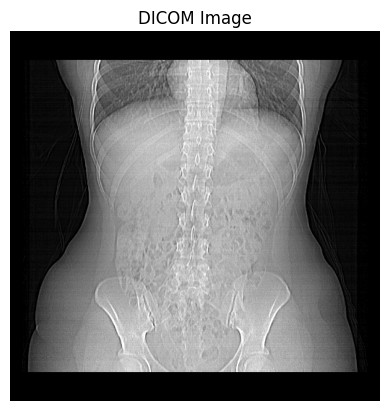

In [14]:
import matplotlib.pyplot as plt

plt.imshow(im, cmap = 'gray')
plt.title('DICOM Image')
plt.axis('off')
plt.show()

### Loading and Manipulating Volume Data

Volume data consists of multiple image slices, often used in medical imaging. We can load these slices and manipulate them to find the sampling rate and field of view. By plotting different slices, we can visualize the internal structure of the volume, which is essential for tasks like diagnosis and treatment planning.







DICOM Files: ['case1_020.dcm', 'case1_016.dcm', 'case1_024.dcm', 'case1_014.dcm', 'case1_012.dcm', 'case1_008.dcm', 'case1_010.dcm', 'case1_018.dcm', 'case1_022.dcm', 'case1_040.dcm', 'case1_052.dcm', 'case1_064.dcm', 'case1_042.dcm', 'case1_030.dcm', 'case1_038.dcm', 'case1_068.dcm', 'case1_062.dcm', 'case1_046.dcm', 'case1_032.dcm', 'case1_056.dcm', 'case1_054.dcm', 'case1_048.dcm', 'case1_058.dcm', 'case1_050.dcm', 'case1_036.dcm', 'case1_060.dcm', 'case1_066.dcm', 'case1_026.dcm', 'case1_028.dcm', 'case1_034.dcm', 'case1_044.dcm']
Reading DICOM (examining files): 1/31 files (3.2%)18/31 files (58.1%)31/31 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 12/31  (38.7%)26/31  (83.9%)31/31  (100.0%)
Number of slices: 31
Number of height: 512
Number of width: 512
Sampling Rate (mm): (1.4220600446065002, 0.732421875, 0.732421875)
Field of view (mm): 44.0838613828015 375.0 375.0


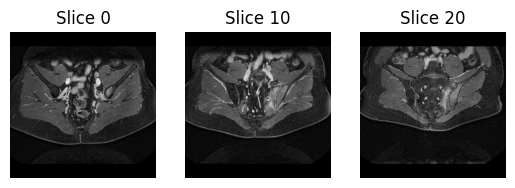

In [ ]:
import imageio
import os

print("DICOM Files:", os.listdir('Vol_data'))

vol = imageio.volread('Vol_data/', 'DICOM')

slices, height, width = vol.shape

print('Number of slices:', slices)
print('Number of height:', height)
print('Number of width:', width)


print('Sampling Rate (mm):', vol.meta['sampling'])

d0, d1, d2 = vol.meta['sampling']

print('Field of view (mm):', slices*d0, height*d1, width*d2)



fig, axes = plt.subplots(nrows = 1, ncols = 3)
axes[0].imshow(vol[0], cmap='gray')
axes[0].set_title('Slice 0')

axes[1].imshow(vol[10], cmap='gray')
axes[1].set_title('Slice 10')

axes[2].imshow(vol[20], cmap='gray')
axes[2].set_title('Slice 20')


for ax in axes:
    ax.axis('off')

plt.show()


### Slicing 3D Images

Slicing 3D images involves extracting specific planes from the volume data to view different perspectives. We can find axial, coronal, and sagittal slices, each offering a unique view of the internal structure. By plotting these slices, we can analyze the data from various angles, aiding in comprehensive examination and diagnosis.


Reading DICOM (examining files): 1/31 files (3.2%)20/31 files (64.5%)31/31 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 13/31  (41.9%)28/31  (90.3%)31/31  (100.0%)


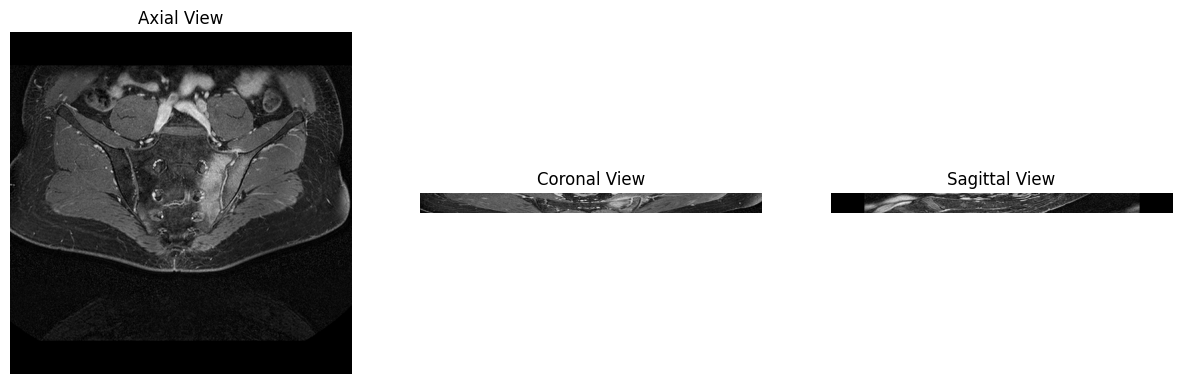

In [29]:
import imageio

vol = imageio.volread('Vol_data/', 'DICOM')

slice_index_1 = vol.shape[0] // 2
slice_index_2 = vol.shape[1] // 2
slice_index_3 = vol.shape[2] // 2

axial_slice = vol[slice_index_1, :, :]
coronal_slice = vol[:, slice_index_2, :]
sagittal_slice = vol[:, :, slice_index_3]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].imshow(axial_slice, cmap='gray')
axes[0].set_title('Axial View')

axes[1].imshow(coronal_slice, cmap='gray')
axes[1].set_title('Coronal View')

axes[2].imshow(sagittal_slice, cmap='gray')
axes[2].set_title('Sagittal View')

for ax in axes:
    ax.axis('off')

plt.show()

## TIFF (Tag Image File Format)

### Reading an image and Acquiring metadata

In [23]:
import tifffile as tiff

# Load the TIFF image
with tiff.TiffFile('r1_CTRL-689_6.tif') as tif:
    image = tif.asarray()
    metadata = tif.pages[0].tags  # Metadata from the first page

    # Print metadata
    for tag in metadata.values():
        print(tag.name, tag.value)

NewSubfileType FILETYPE.UNDEFINED
ImageWidth 2048
ImageLength 2048
BitsPerSample 16
PhotometricInterpretation PHOTOMETRIC.MINISBLACK
ImageDescription ImageJ=1.53c
unit=micron
min=51.0
max=1938.0
StripOffsets (1780,)
SamplesPerPixel 1
RowsPerStrip 2048
StripByteCounts (8388608,)
XResolution (32834493, 1000000)
YResolution (32834493, 1000000)
ResolutionUnit RESUNIT.NONE
ColorMap [[    0   256   512   768  1024  1280  1536  1792  2048  2304  2560  2816
   3072  3328  3584  3840  4096  4352  4608  4864  5120  5376  5632  5888
   6144  6400  6656  6912  7168  7424  7680  7936  8192  8448  8704  8960
   9216  9472  9728  9984 10240 10496 10752 11008 11264 11520 11776 12032
  12288 12544 12800 13056 13312 13568 13824 14080 14336 14592 14848 15104
  15360 15616 15872 16128 16384 16640 16896 17152 17408 17664 17920 18176
  18432 18688 18944 19200 19456 19712 19968 20224 20480 20736 20992 21248
  21504 21760 22016 22272 22528 22784 23040 23296 23552 23808 24064 24320
  24576 24832 25088 25344 25

## Preprocessing the image and Visualization

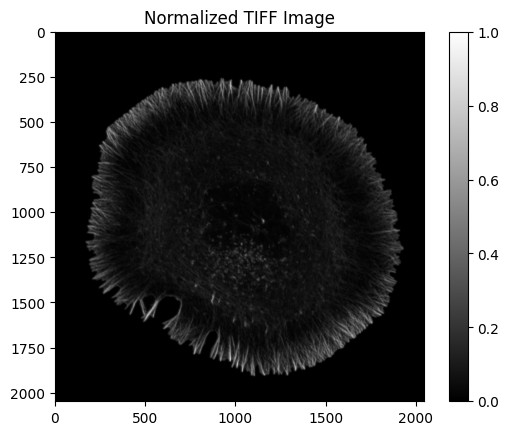

In [25]:
import numpy as np

# Normalize the image to [0, 1]
image_normalized = (image - np.min(image)) / (np.max(image) - np.min(image))

# Visualization
plt.imshow(image_normalized, cmap='gray')  # Use an appropriate color map
plt.title('Normalized TIFF Image')
plt.colorbar()
plt.show()

## Python Tools Used in This Tutorial

1. **NumPy**
2. **Numba**
3. **Matplotlib**
4. **Scikit-Learn**
5. **Scikit-Image**

## Numpy

### Why Numpy

Numpy is a powerful library for numerical operations in Python. It is particularly useful for efficient computation on large datasets. For example, using Numpy for dot product operations on random data is significantly faster and more efficient than using standard Python lists. This efficiency makes Numpy an essential tool for data manipulation and analysis.


In [26]:
import numpy as np
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

# using numpy to do dot multiplication
start = time.time()
c = np.dot(a, b)
end = time.time()
print(c)
print("numpy spend " + str(end-start) + " ms")

# using list to do dot multiplication
lista = a.tolist()
listb = b.tolist()

start = time.time()
c = 0
for i in range(1000000):
    c += lista[i] * listb[i]
end = time.time()
print(c)
print("list spend " + str(end-start) + " ms")


249842.11429289164
numpy spend 0.0016863346099853516 ms
249842.11429288166
list spend 0.2254495620727539 ms


### Numba

Numba is a just-in-time compiler for Python that translates a subset of Python and Numpy code into fast machine code. By using Numba, we can significantly improve the performance of our code, especially for computationally intensive tasks. This makes Numba an excellent choice for speeding up numerical algorithms without changing the original Python code.


In [27]:
import numpy as np
from numba import jit

def test():
    x = 0
    for i in np.arange(5000):
        x += i
    return x

%timeit test()

860 µs ± 219 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
@jit(nopython=True)
def test():
    x = 0
    for i in np.arange(5000):
        x += i
    return x

%timeit test()


The slowest run took 18.74 times longer than the fastest. This could mean that an intermediate result is being cached.
6.48 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
import numpy as np
from numba import jit, prange
import time

# Generate random data
x = np.random.rand(1000, 1000)
y = np.random.rand(1000, 1000)

# Define a function to perform trigonometric operations without Numba
def do_trig_plain(x, y):
    z = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i, j] = np.sin(x[i, j]) ** 2 + np.cos(y[i, j])
    return z

# Measure the time taken by the plain function
start = time.time()
do_trig_plain(x, y)
end = time.time()
print(f"Plain Python function took {end - start:.2f} seconds")

# Define a function to perform trigonometric operations with Numba JIT compilation
@jit(nopython=True)
def do_trig_numba(x, y):
    z = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i, j] = np.sin(x[i, j]) ** 2 + np.cos(y[i, j])
    return z

# Measure the time taken by the Numba JIT-compiled function
start = time.time()
do_trig_numba(x, y)
end = time.time()
print(f"Numba JIT-compiled function took {end - start:.2f} seconds")

# Define a function to perform trigonometric operations with Numba JIT compilation and parallel execution
@jit(nopython=True, parallel=True)
def do_trig_parallel(x, y):
    z = np.empty_like(x)
    for i in prange(x.shape[0]):
        for j in prange(x.shape[1]):
            z[i, j] = np.sin(x[i, j]) ** 2 + np.cos(y[i, j])
    return z

# Measure the time taken by the Numba parallel JIT-compiled function
start = time.time()
do_trig_parallel(x, y)
end = time.time()
print(f"Numba parallel JIT-compiled function took {end - start:.2f} seconds")

# Use %timeit to get more accurate and averaged timing results
plain_time = %timeit -o do_trig_plain(x, y)
numba_time = %timeit -o do_trig_numba(x, y)
parallel_time = %timeit -o do_trig_parallel(x, y)

print("\nSummary of timings:")
print(f"Plain Python function: {plain_time.average * 1000:.2f} ms per loop")
print(f"Numba JIT-compiled function: {numba_time.average * 1000:.2f} ms per loop")
print(f"Numba parallel JIT-compiled function: {parallel_time.average * 1000:.2f} ms per loop")


Plain Python function took 2.91 seconds
Numba JIT-compiled function took 0.58 seconds
Numba parallel JIT-compiled function took 1.28 seconds
2.69 s ± 539 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.2 ms ± 437 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
33.8 ms ± 8.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Summary of timings:
Plain Python function: 2687.79 ms per loop
Numba JIT-compiled function: 25.16 ms per loop
Numba parallel JIT-compiled function: 33.81 ms per loop


### Matplotlib

Matplotlib is a versatile plotting library for creating static, animated, and interactive visualizations in Python. One powerful feature is the ability to add subplots with different color maps (`cmap`), allowing for detailed and comparative visual analysis. By using `plt.subplot()` and specifying different `cmap` values, we can effectively present and interpret various aspects of the data.


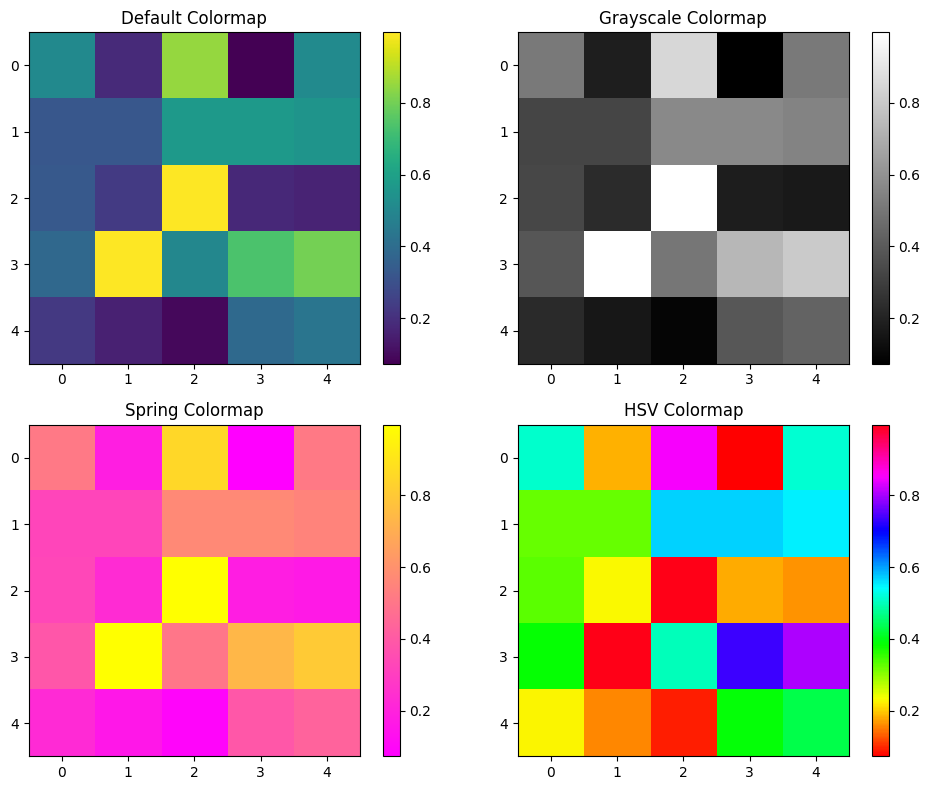

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(5, 5)

fig = plt.figure(figsize=(10, 8))


ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(data)
ax1.set_title('Default Colormap')

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(data, cmap='gray')
ax2.set_title('Grayscale Colormap')

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(data, cmap='spring')
ax3.set_title('Spring Colormap')

ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(data, cmap='hsv')
ax4.set_title('HSV Colormap')

for ax in [ax1, ax2, ax3, ax4]:
    fig.colorbar(ax.images[0], ax=ax)

plt.tight_layout()

plt.show()


#Sklearn for Machine Learning




### Sklearn Datasets

Scikit-Learn (Sklearn) provides easy access to various datasets, including the digits dataset, which is commonly used for classification tasks. By loading the digits dataset, we can explore its structure, including the shape of the input data and target labels. This initial exploration helps in understanding the dataset and preparing it for machine learning models.



digits Dataset data type: <class 'numpy.ndarray'>
digits data samples: 1797
digits data feature size: 64
digits data target shape: (1797,)


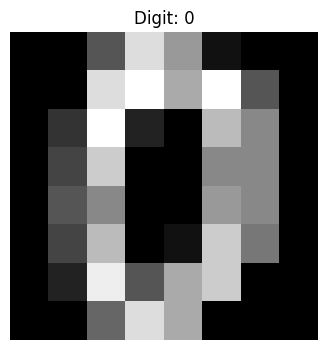

In [ ]:
import sklearn
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()

print('digits Dataset data type:', type(digits.data))

print('digits data samples:', digits.data.shape[0])
print('digits data feature size:', digits.data.shape[1])

print('digits data target shape:', digits.target.shape)

index = 0
image = digits.data[index].reshape(8, 8)
label = digits.target[index]


plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f'Digit: {label}')
plt.axis('off')
plt.show()

### Data Preprocessing with Sklearn

Data preprocessing is a crucial step in preparing data for machine learning. Using Sklearn, we can load datasets and perform tasks such as splitting the data into training and testing sets with `train_test_split`. Additionally, we can apply one-hot encoding to categorical variables and normalize the data to ensure that it is on a similar scale, which improves the performance of many machine learning algorithms.


In [ ]:
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

print('Actual training sample size:', digits.data.shape[0])

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

print('Training sample after split:', x_train.shape[0])
print('Testing sample after split:', x_test.shape[0])


print('-'*40)
print('One-hot encoding')

y_train_oh = (y_train.reshape(y_train.shape[0], 1) == np.arange(10)).astype(np.int32)
y_test_oh = (y_test.reshape(y_test.shape[0], 1) == np.arange(10)).astype(np.int32)

print('Actual training label:', y_train[0])
print('One hot encoded training label:', y_train_oh[0])


x_train_norm = (x_train - x_train.mean())/x_train.std()
x_test_norm = (x_test - x_test.mean())/x_test.std()


Actual training sample size: 1797
Training sample after split: 1257
Testing sample after split: 540
----------------------------------------
One-hot encoding
Actual training label: 7
One hot encoded training label: [0 0 0 0 0 0 0 1 0 0]


### Image Classification Training & Testing

For image classification tasks, we can use Sklearn's `MLPClassifier`, a neural network model. By fitting the model to the training data, we train it to recognize patterns and features in the images. Once trained, we can use the model to predict labels on the test data, allowing us to evaluate its performance and accuracy in classifying new images.



In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (100,), activation='relu', solver='adam', learning_rate_init = 0.001, max_iter = 2000)

clf.fit(x_train_norm, y_train_oh)

predicted_y_test_oh = clf.predict(x_test_norm)
predicted_y = np.sum(predicted_y_test_oh*np.arange(10), axis = 1)

print('Accuracy achieved with the model:',sum((y_test == predicted_y).astype(np.float64))/len(y_test))

Accuracy achieved with the model: 0.9629629629629629


#Image Compression


### KMeans

KMeans clustering is an effective technique for image compression. By grouping similar pixels into clusters, we can reduce the number of unique colors in an image. This reduces the image's size while maintaining visual quality. Using Sklearn's `KMeans` algorithm, we can compress images by assigning each pixel to the nearest cluster center, effectively reducing the complexity of the image data.


Reshaped image shape: (82498, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels shape: (82498,)
Labels: [3 3 3 ... 3 3 3]
Compressed image shape (flat): (82498, 3)
Compressed image shape: (247, 334, 3)


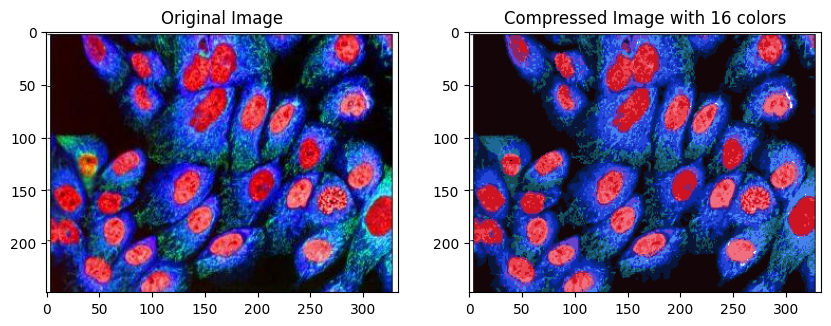

In [ ]:
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('compression.jpg')

img_ = img.reshape(-1, 3)
print("Reshaped image shape:", img_.shape)

# Apply MiniBatchKMeans to compress the image
n_colors = 16
kmeans = MiniBatchKMeans(n_clusters=n_colors, batch_size=2000)
kmeans.fit(img_)

# Predict the cluster for each pixel
labels = kmeans.predict(img_)
print("Labels shape:", labels.shape)
print("Labels:", labels)

# Replace each pixel with the color of its corresponding cluster center
compressed_img_ = kmeans.cluster_centers_[labels]
print("Compressed image shape (flat):", compressed_img_.shape)

# Reshape the compressed image back to the original image shape
compressed_img = compressed_img_.reshape(img.shape)
print("Compressed image shape:", compressed_img.shape)

# Display the original and compressed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title(f"Compressed Image with {n_colors} colors")
plt.imshow(compressed_img.astype(np.uint8))

plt.show()


### PCA

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction. By transforming the data into a new set of orthogonal variables called principal components, PCA reduces the number of dimensions while preserving as much variability as possible. This is especially useful for simplifying complex datasets and improving the performance of machine learning algorithms.


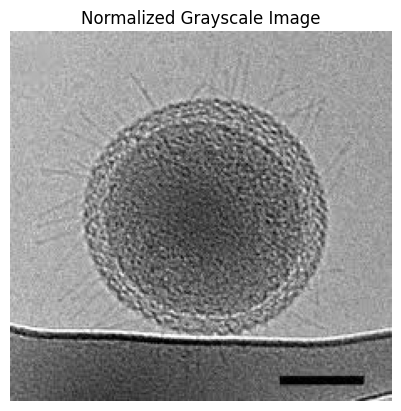

In [ ]:
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread(r"pca.jpeg")

img = color.rgb2gray(img)

img = (img - img.mean()) / img.std()

plt.imshow(img, cmap='gray')
plt.title('Normalized Grayscale Image')
plt.axis('off')  # Hide axis
plt.show()

Before compression, the shape of img is: (221, 228)
After compression, the shape of img is: (221, 10)
After reconstruction, the shape of img is: (221, 228)


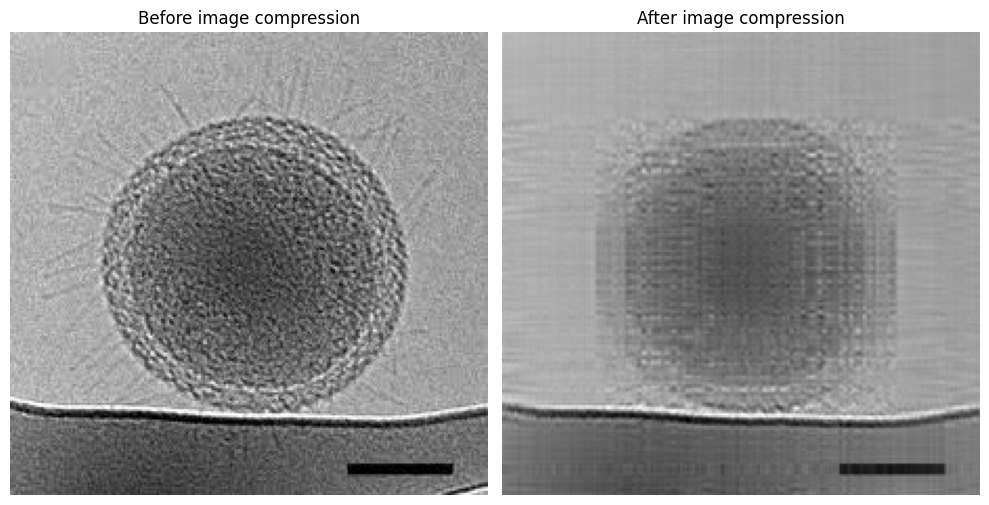

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io, color

img = io.imread(r"pca.jpeg")
img = color.rgb2gray(img)
img = (img - img.mean()) / img.std()

print('Before compression, the shape of img is:', img.shape)

pca = PCA(n_components=10).fit(img)
img_compressed = pca.transform(img)

print('After compression, the shape of img is:', img_compressed.shape)

img_reconstructed = pca.inverse_transform(img_compressed)

print('After reconstruction, the shape of img is:', img_reconstructed.shape)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Before image compression')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('After image compression')
plt.imshow(img_reconstructed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### SKImage

Scikit-Image (SKImage) is a comprehensive library for image processing in Python. The `transform` module within SKImage provides various functions for image transformation, such as scaling, rotating, and warping. These transformations are essential for preprocessing images, augmenting datasets, and enhancing image analysis workflows.


(252, 247, 3)


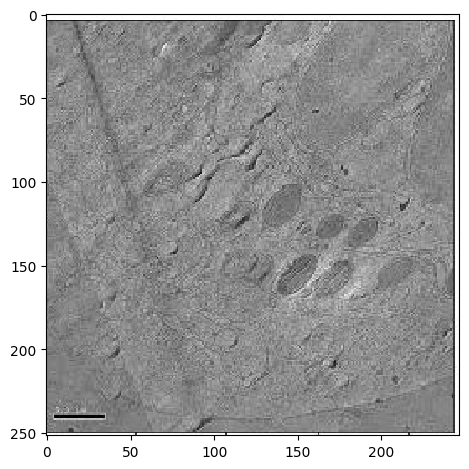

In [ ]:
from skimage import io,transform

img = io.imread('IO_transform_img.png')
io.imshow(img)
print('Original Image shape:',img.shape)

Transformed image shape: (150, 75, 3)


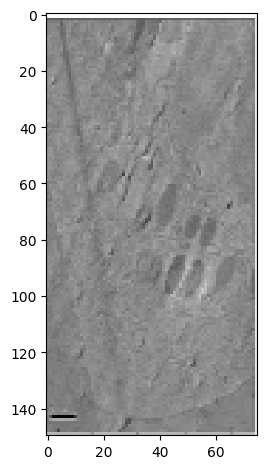

In [ ]:
dst = transform.resize(img, (150, 75))
io.imshow(dst)
print('Transformed image shape:',dst.shape)

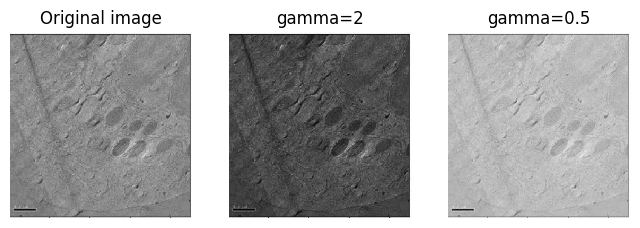

In [30]:
from skimage import exposure, img_as_float
import matplotlib.pyplot as plt
from skimage import io

image = img_as_float(io.imread('IO_transform_img.png'))

gamma1 = exposure.adjust_gamma(image, 2)
gamma2 = exposure.adjust_gamma(image, 0.5)

plt.figure('adjust_gamma', figsize=(8, 8))

plt.subplot(131)
plt.title('Original image')
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
plt.title('gamma=2')
plt.imshow(gamma1)
plt.axis('off')

plt.subplot(133)
plt.title('gamma=0.5')
plt.imshow(gamma2)
plt.axis('off')

plt.show()


### Edge Detection

Edge detection is a fundamental technique in image processing for identifying boundaries within images. Using the `filter` module from Scikit-Image (SKImage), we can apply various edge detection algorithms, such as the Sobel or Canny filters. These filters highlight significant edges in the image, which are crucial for tasks like object detection and image segmentation.


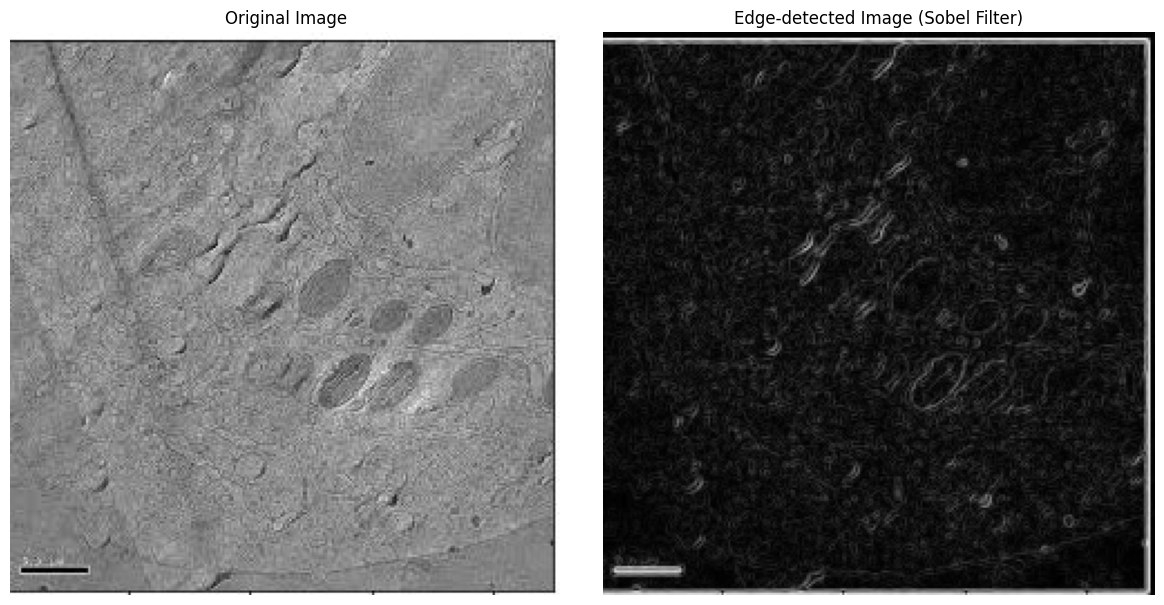

In [ ]:
from skimage import io, color, filters
import matplotlib.pyplot as plt

image_path = 'IO_transform_img.png'
image = io.imread(image_path)

gray_image = color.rgb2gray(image)

edges = filters.sobel(gray_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge-detected Image (Sobel Filter)')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
